<a href="https://colab.research.google.com/github/ShashankS1ngh/ML/blob/main/Improved_TYPESOFDISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from IPython.core.display import display, HTML, Javascript

color_map = ['#8A0030', '#BA1141']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [44]:
!pip install umap
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
import umap

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [46]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']


In [47]:
def Heart_Disease_data(set_data):
  housing_path="https://raw.githubusercontent.com/ShashankS1ngh/ML/main/DATASETS/"
  csv_path=os.path.join(housing_path,set_data)
  return pd.read_csv(csv_path)

In [48]:
df= Heart_Disease_data("diseaseType.csv")

In [49]:
heart_train = df.apply(pd.to_numeric, errors = 'coerce')
# Print data
print('Data type of columns after conversion')
print(heart_train.dtypes)
print()
# Show NaN count
print('Total value NaN after heart_train converted to numeric value')
print(heart_train.isna().sum())

Data type of columns after conversion
age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Total value NaN after heart_train converted to numeric value
age           0
sex           0
cp            0
trestbps     47
chol         24
fbs          78
restecg       2
thalach      44
exang        44
oldpeak      49
slope       262
ca          518
thal        410
target        0
dtype: int64


In [50]:
heart_train = heart_train.dropna(thresh=10)
print('Total NaN Value')
print(heart_train.isna().sum())

Total NaN Value
age           0
sex           0
cp            0
trestbps      2
chol         21
fbs          77
restecg       2
thalach       0
exang         0
oldpeak       5
slope       218
ca          473
thal        368
target        0
dtype: int64


In [51]:
heart_train = heart_train.dropna(thresh=10)

# Count NaN value
print('Total NaN Value')
print(heart_train.isna().sum())

Total NaN Value
age           0
sex           0
cp            0
trestbps      2
chol         21
fbs          77
restecg       2
thalach       0
exang         0
oldpeak       5
slope       218
ca          473
thal        368
target        0
dtype: int64


In [52]:
heart_train_0 = heart_train[heart_train["target"] == 0].copy()
heart_train_1 = heart_train[heart_train["target"] == 1].copy()
heart_train_2 = heart_train[heart_train["target"] == 2].copy()
heart_train_3 = heart_train[heart_train["target"] == 3].copy()
heart_train_4 = heart_train[heart_train["target"] == 4].copy()

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer

In [54]:
def fill_nan_with_value(train):
    train['slope'].fillna(train['slope'].mode()[0], inplace=True)
    train['cp'].fillna(train['cp'].mode()[0], inplace=True)
    train['restecg'].fillna(train['restecg'].mode()[0], inplace=True)
    train['fbs'].fillna(train['fbs'].mode()[0], inplace=True)  
    train['thal'].fillna(train['thal'].mode()[0], inplace=True)
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    c = train.columns
    train = pd.DataFrame(imp.fit_transform(train))
    train.columns = c
    return train

In [55]:
heart_train_0 = fill_nan_with_value(heart_train_0)
heart_train_1 = fill_nan_with_value(heart_train_1)
heart_train_2 = fill_nan_with_value(heart_train_2)
heart_train_3 = fill_nan_with_value(heart_train_3)
heart_train_4 = fill_nan_with_value(heart_train_4)

heart_train = pd.concat([heart_train_0, heart_train_1, heart_train_2, heart_train_3, heart_train_4])

heart_train = heart_train.reset_index()
del heart_train['index']

# Count NaN value
print('Total NaN Value')
print(heart_train.isna().sum())

Total NaN Value
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [62]:
heart_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0


In [63]:
heart_train.drop(heart_train[heart_train.thal == '?'].index, inplace=True)
heart_train.drop(heart_train[heart_train.ca == '?'].index, inplace=True)
heart_train.reset_index(drop=True,inplace=True)

In [64]:
heart_train.eq('?').any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [65]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1037 non-null   float64
 1   sex       1037 non-null   float64
 2   cp        1037 non-null   float64
 3   trestbps  1037 non-null   float64
 4   chol      1037 non-null   float64
 5   fbs       1037 non-null   float64
 6   restecg   1037 non-null   float64
 7   thalach   1037 non-null   float64
 8   exang     1037 non-null   float64
 9   oldpeak   1037 non-null   float64
 10  slope     1037 non-null   float64
 11  ca        1037 non-null   float64
 12  thal      1037 non-null   float64
 13  target    1037 non-null   float64
dtypes: float64(14)
memory usage: 113.5 KB


In [66]:
print(heart_train)

       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1     37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
2     41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
3     56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
4     57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1032  61.0  1.0  4.0     190.0  287.0  1.0      2.0    150.0    1.0      2.0   
1033  53.0  1.0  4.0     125.0    0.0  0.0      0.0    120.0    0.0      1.5   
1034  58.0  1.0  3.0     112.0  230.0  0.0      2.0    165.0    0.0     25.0   
1035  58.0  1.0  4.0     114.0  318.0  0.0      1.0    140.0    0.0     44.0   
1036  56.0  1.0  3.0     170.0    0.0  0.0      2.0    123.0    1.0      2.5   

      slope   ca  thal  target  
0     

In [67]:
heart_train.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,1037.000000,53.558341,9.345354,28.000000,47.000000,54.000000,60.000000,77.000000
sex,1037.000000,0.742527,0.437453,0.000000,0.000000,1.000000,1.000000,1.000000
cp,1037.000000,3.233365,0.938004,1.000000,3.000000,4.000000,4.000000,4.000000
trestbps,1037.000000,132.160077,18.673723,0.000000,120.000000,130.000000,140.000000,200.000000
chol,1037.000000,215.380424,97.129089,0.000000,197.000000,233.500000,270.000000,564.000000
fbs,1037.000000,0.134041,0.340860,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,1037.000000,0.709740,0.890551,0.000000,0.000000,0.000000,2.000000,2.000000
thalach,1037.000000,141.646095,25.706224,60.000000,122.000000,144.000000,162.000000,202.000000
exang,1037.000000,0.372228,0.483632,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,1037.000000,3.077338,6.696582,-2.600000,0.000000,0.900000,2.000000,62.000000


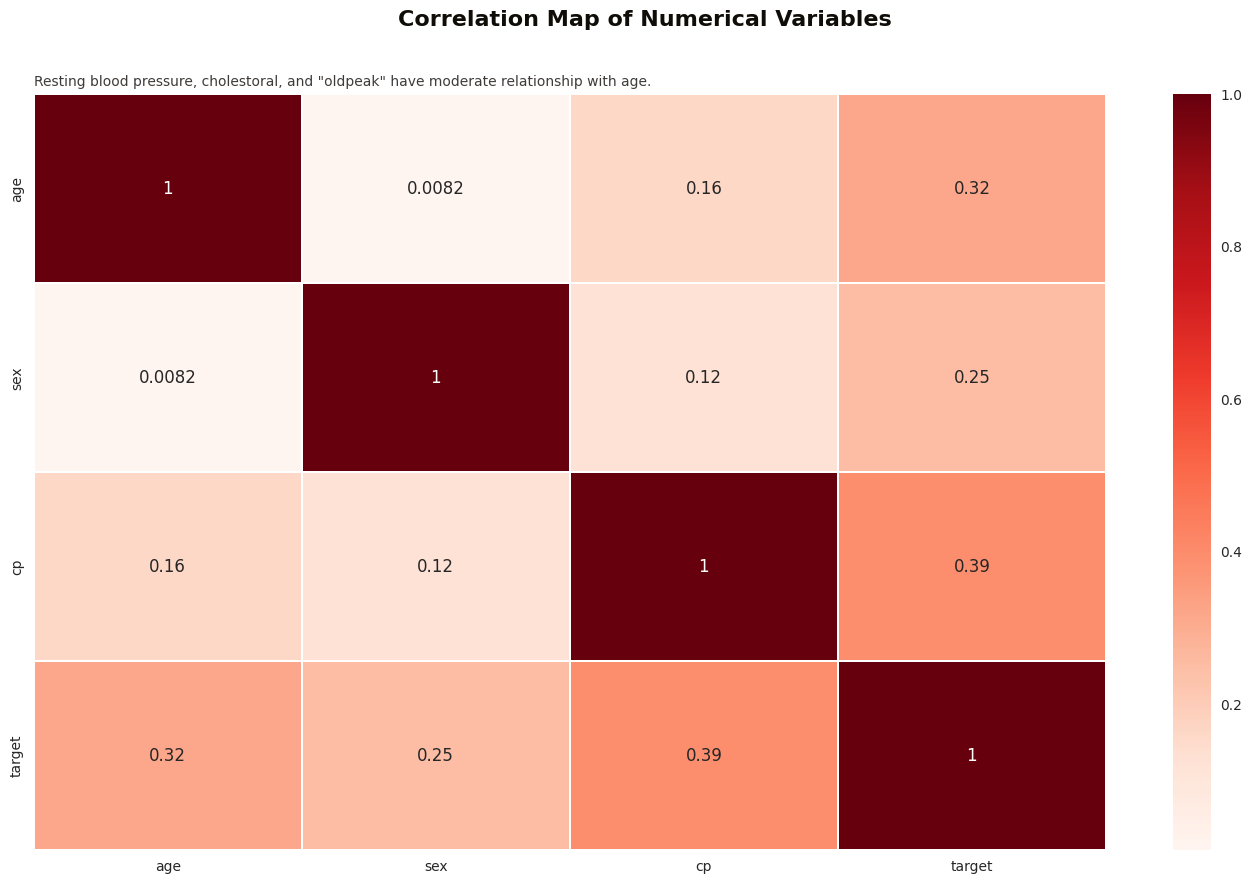

In [68]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.29, y=1.02, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [69]:
heart_train.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [70]:
y = heart_train.target
X = heart_train.drop(['target'], axis=1)

In [71]:
data_positive = heart_train[heart_train.target != 0]
y_pos = data_positive.target
X_pos = data_positive.drop(['target'], axis=1)

In [72]:
dict_binary = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
y_binary = pd.Series(list(map(lambda x: dict_binary[x], y)), name= y.name, index= y.index)

In [73]:
data_train, data_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size=0.8, test_size=0.2, random_state=0)

In [74]:
data_train_pos, data_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, stratify=y_pos, train_size=0.8, test_size=0.2, random_state=0)

In [75]:
y_train_binary = y_binary.iloc[y_train.index]
y_test_binary = y_binary.iloc[y_test.index]

In [76]:
df_type_num = pd.DataFrame(data=zip(data_train.dtypes,df.nunique()), columns=['Type', 'Unique'], index = data_train.columns)
df_type_num

,Type,Unique
age,float64,49
sex,float64,2
cp,float64,4
trestbps,float64,61
chol,float64,211
fbs,float64,3
restecg,float64,4
thalach,float64,117
exang,float64,3
oldpeak,float64,81


In [77]:
data_train_lb = data_train.copy()

In [78]:
fts_cat = {'sex': {'0': 'Female', '1':'Male'}, 'fbs': {'0': 'False', '1': 'True'}, 
        'cp': {'1':'typical', '2': 'atypical', '3': 'non-anginal', '4': 'asymptomatic '},
        'restecg':{'0':'normal','1': 'abnormality', '2':'hypertrophy'},
        'exang': {'1':'yes','0':'no'}, 'slope': {'1':'up','2':'flat','3':'down'},
        'thal':{'3': 'normal','6': 'fixed','7': 'reversable'}}

In [79]:
cat = df_type_num[df_type_num['Unique'] < 6]
cat

,Type,Unique
sex,float64,2
cp,float64,4
fbs,float64,3
restecg,float64,4
exang,float64,3
slope,float64,4
ca,float64,5
thal,float64,4


In [80]:
cat_ft = list(cat.index) 
data_train_lb[cat_ft] = data_train_lb[cat_ft].astype('object')

In [81]:
data_train_lb.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
dtype: object

In [82]:
for ft in fts_cat.keys():
    values = data_train_lb[ft].unique()
    for val in values:
        data_train_lb.loc[data_train_lb[ft] == val, ft] = fts_cat[ft][f'{int(float(val))}']

In [83]:
num_ft = list(set(data_train.columns) - set(cat_ft))
num_ft

['trestbps', 'thalach', 'age', 'chol', 'oldpeak']

In [84]:
data_train_lb.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
625,57.0,Female,atypical,130.0,236.0,False,hypertrophy,174.0,no,0.0,flat,1.0,normal
717,38.0,Male,asymptomatic,110.0,233.5,False,normal,150.0,yes,1.0,flat,1.0,reversable
619,48.0,Female,asymptomatic,138.0,214.0,False,normal,108.0,yes,15.0,flat,1.0,reversable
968,60.0,Female,asymptomatic,150.0,258.0,False,hypertrophy,157.0,no,26.0,flat,2.0,reversable
154,39.0,Female,non-anginal,138.0,220.0,False,normal,152.0,no,0.0,flat,0.0,normal


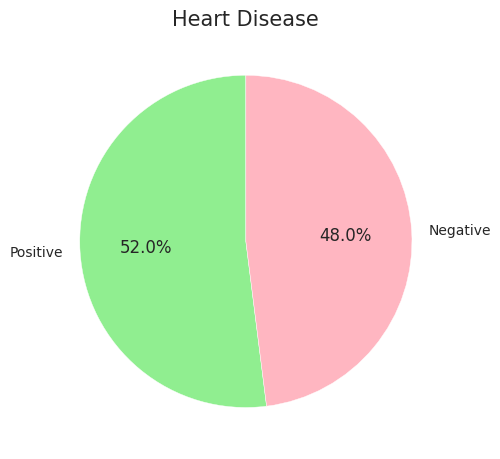

In [85]:
dict_binary = {'0': 'Negative', '1':'Positive'}
labels = [dict_binary[str(lb)] for lb in y_train_binary.value_counts().index]
plt.pie(y_train_binary.value_counts(), labels= labels, startangle=90, autopct='%1.1f%%', colors = ['lightgreen','lightpink']);

plt.gca().set_title('Heart Disease', fontsize= '15');

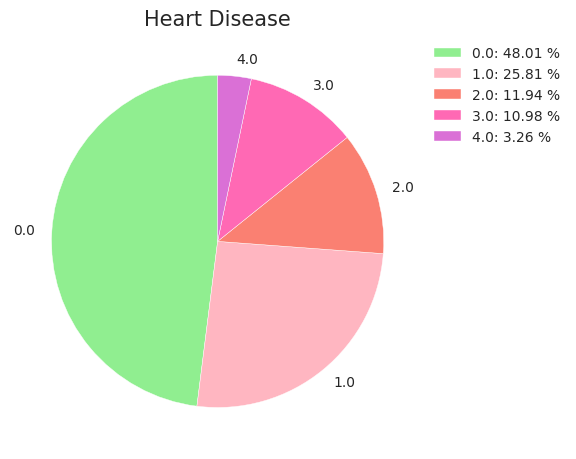

In [86]:
labels = y_train.value_counts().index
counts = y_train.value_counts()
plt.pie(counts, labels= labels, startangle=90, colors = ['lightgreen','lightpink', 'salmon', 'hotpink','orchid']);
labels_box = [f'{label}: {round(c*100/data_train_lb.shape[0],2)} %' for label, c in zip(labels, counts)]
plt.gca().legend(labels_box, loc='best', bbox_to_anchor=(0.99, 1.0), fontsize=10)
plt.gca().set_title('Heart Disease', fontsize= '15');

In [87]:
dict_fts = {'age': 'Age','sex': 'Sex', 'cp': 'Chest Pain', 'trestbps':'Resting Blood Pressure', 'chol': 'Serum Cholestoral [mg/dl]', 'fbs': 'Fasting Blood Sugar [> 120 mg/dl]', 
'restecg':'Resting Electrocardiographic Results', 'thalach':'Maximum Heart Rate Achieved', 'exang':'Exercise Induced Angina',
'oldpeak':'OldPeak','slope': 'Slope','ca':'Major Vessels','thal':'Thalassemia', 'target':'Heart Disease'}

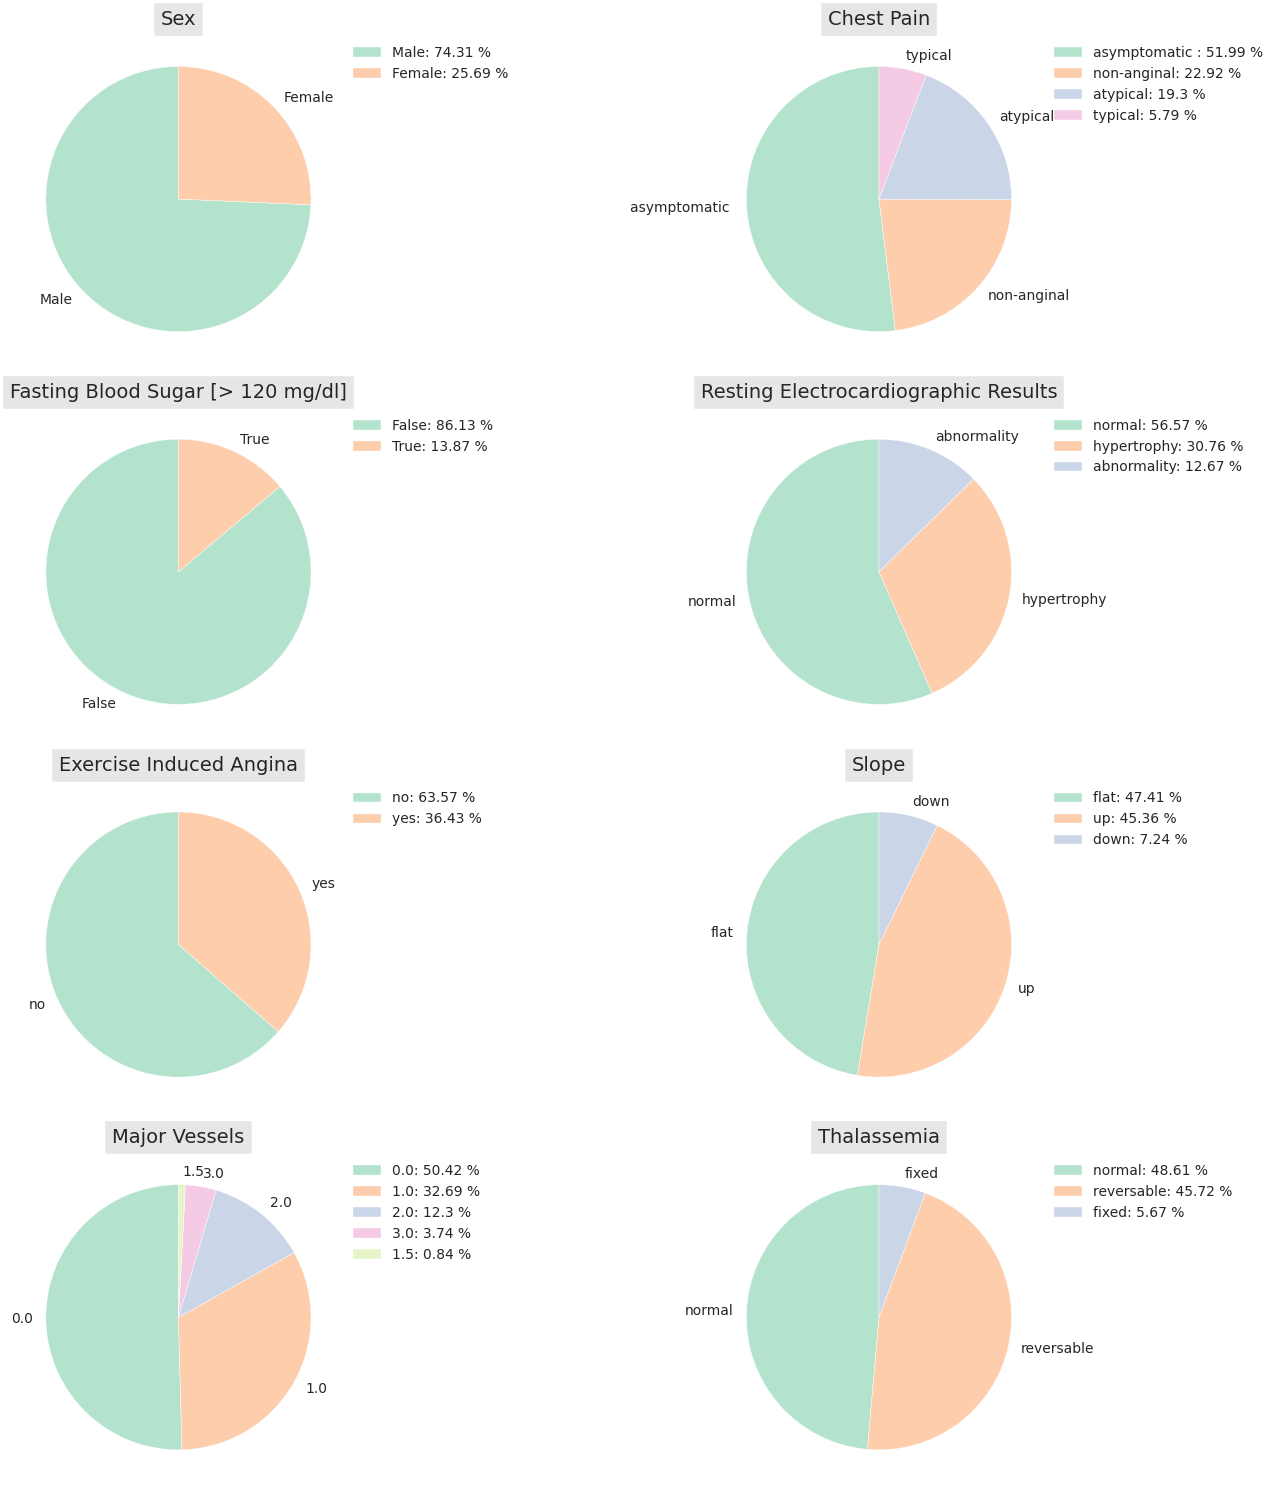

In [88]:
num = len(cat_ft)

fig = plt.figure(figsize=(15,30))

for i, ft in enumerate(cat_ft):

    counts = data_train_lb[ft].value_counts()
    colors = sns.color_palette('Pastel2')[0:len(counts)]
    labels = list(counts.index)

    plt.subplot(num,2,i+1)
    plt.pie(counts, colors= colors, startangle=90, labels = labels);

    plt.gca().set_title(dict_fts[ft], fontsize='14', bbox={'facecolor':'0.9', 'pad':5})

    labels_box = [f'{label}: {round(c*100/data_train_lb.shape[0],2)} %' for label, c in zip(labels, counts)]
    plt.gca().legend(labels_box, loc='best', bbox_to_anchor=(0.99, 1.0), fontsize=10)

    i+=1

plt.tight_layout()

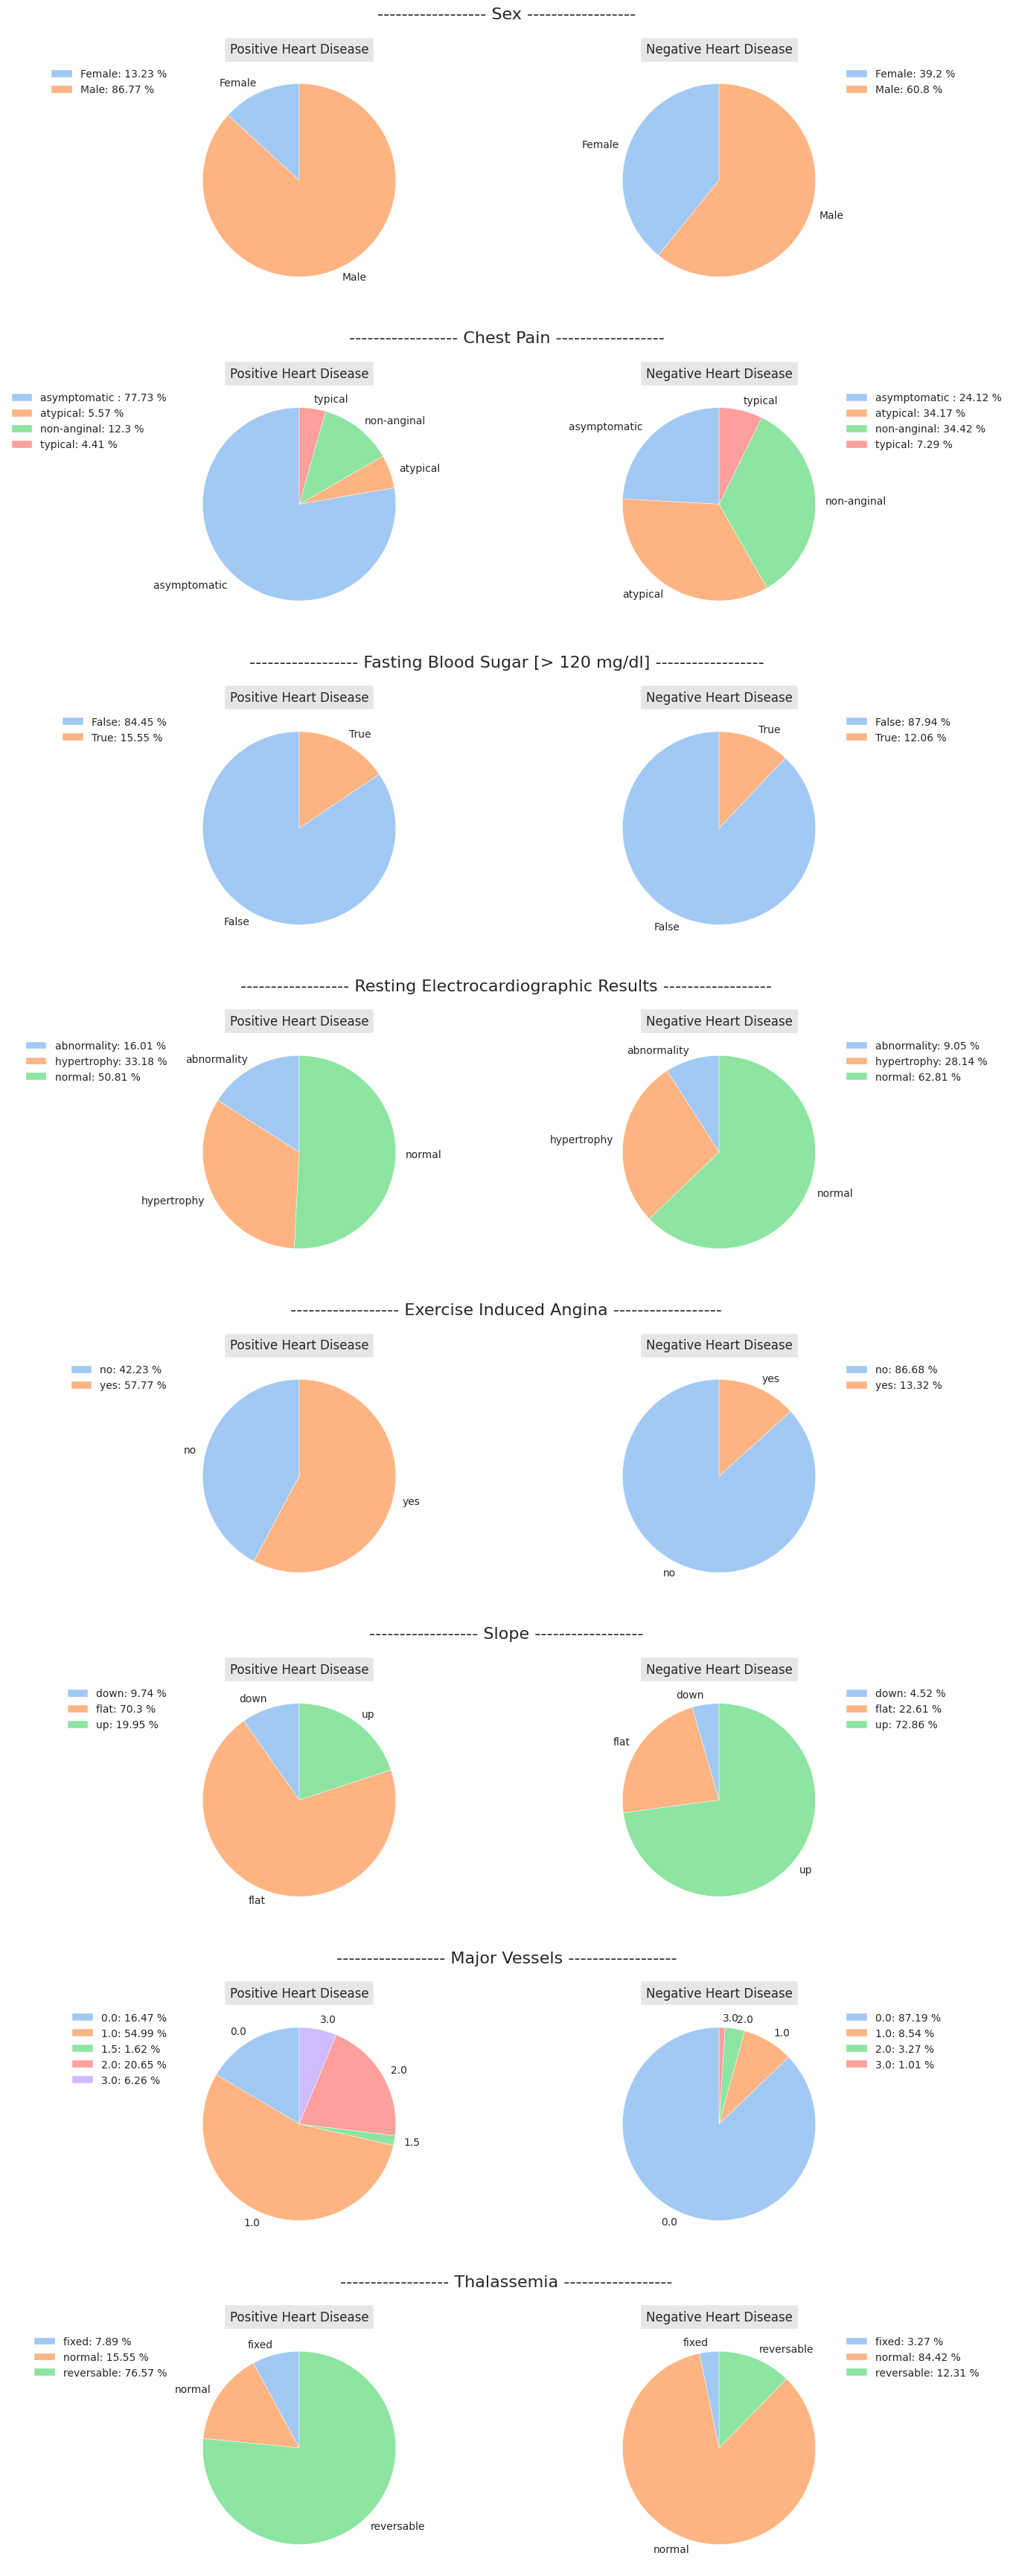

In [89]:
df_filtered = data_train_lb[cat_ft].nunique()

num_plots = len(df_filtered)
i=1

data_positive = data_train_lb[y_train!=0]
data_negative = data_train_lb[y_train==0]

fig, big_axes = plt.subplots(figsize=(15.0, 35.0) , nrows=num_plots, ncols=1) 

for row, big_ax in enumerate(big_axes, start=1):
    ft = df_filtered.index[row-1]
    big_ax.set_title(f'------------------ {dict_fts[ft]} ------------------ \n \n', fontsize=16)
    big_ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft = False, labelbottom = False )
    big_ax._frameon = False
    big_ax.grid(False)


for ft in df_filtered.index:

    ax = fig.add_subplot(num_plots,2,i)
    pos_ft_num = data_positive[ft].value_counts().sort_index()
    labels = list(pos_ft_num.index)

    colors = sns.color_palette('pastel')[0:len(pos_ft_num)]

    ax.pie(pos_ft_num, labels=labels, colors = colors, startangle=90)
    ax.set_title('Positive Heart Disease', bbox={'facecolor':'0.9', 'pad':5})
    labels_box = [f'{label}: {round(counts*100/data_positive.shape[0],2)} %' for label, counts in zip(labels, pos_ft_num)]
    ax.legend(labels_box, loc='best', bbox_to_anchor=(-0.01, 1.0), fontsize=10)


    ax = fig.add_subplot(num_plots,2,i+1)
    neg_ft_num = data_negative[ft].value_counts().sort_index()
    labels = list(neg_ft_num.index)


    ax.pie(neg_ft_num, labels= labels, colors= colors, startangle=90)
    ax.grid(None)
    ax.set_title('Negative Heart Disease', bbox={'facecolor':'0.9', 'pad':5})
    labels_box = [f'{label}: {round(counts*100/data_negative.shape[0],2)} %' for label, counts in zip(labels, neg_ft_num)]
    ax.legend(labels_box, loc='best', bbox_to_anchor=(0.99, 1.0), fontsize=10)

    i=i+2

#fig.set_facecolor('w')
plt.tight_layout()
plt.show()

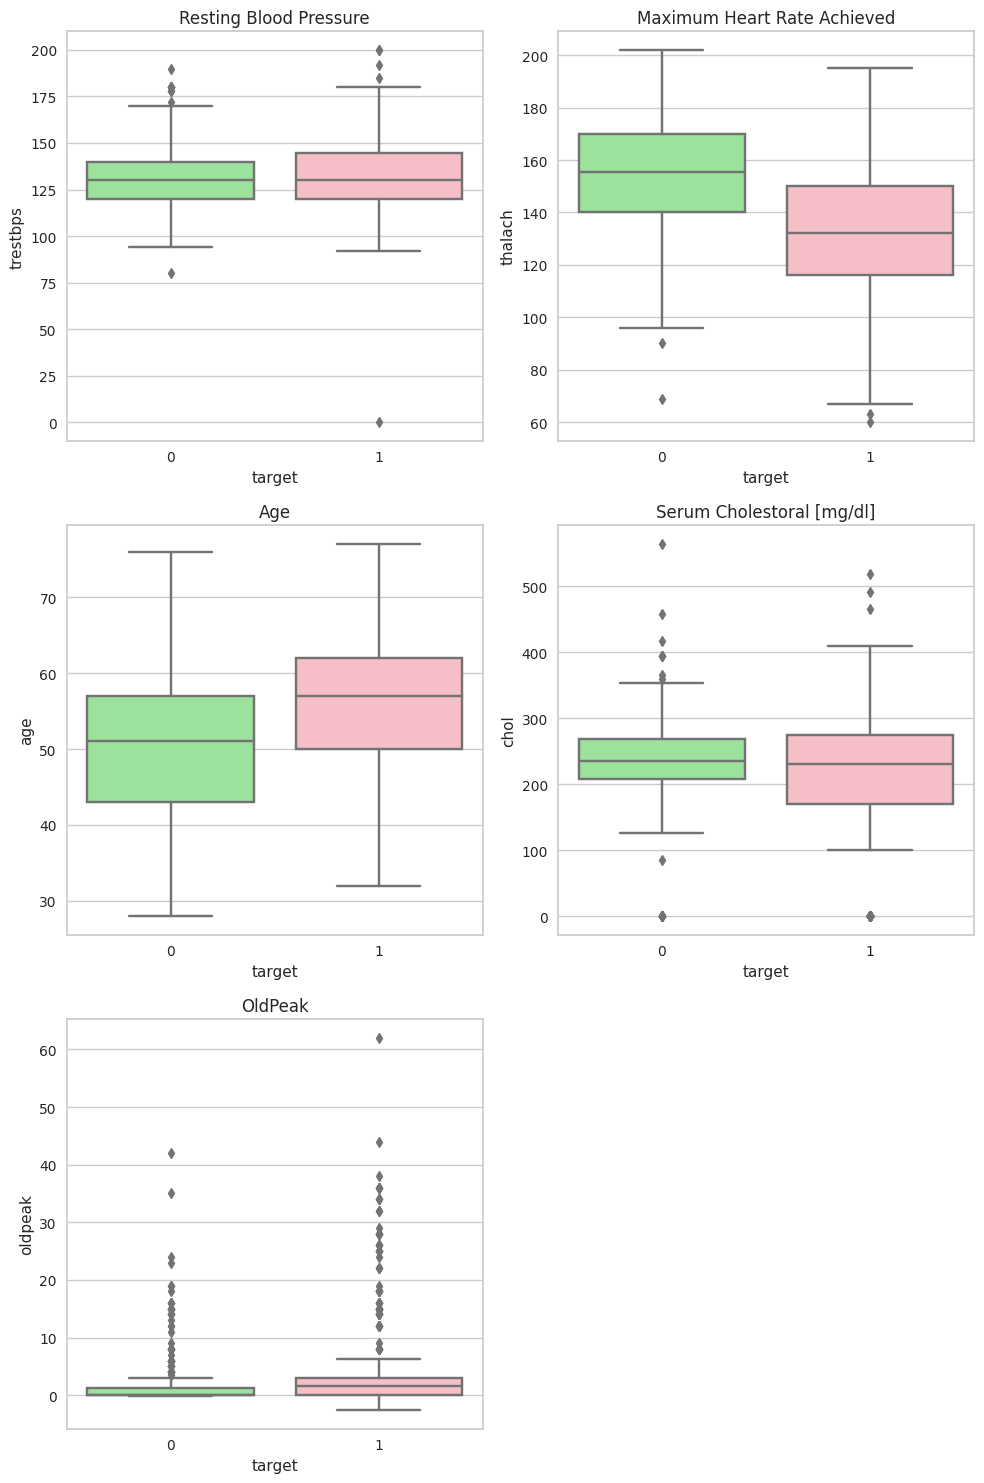

In [90]:
n_rows = len(num_ft)//2 + len(num_ft)%2

fig = plt.figure(figsize=(10.0, 15.0)) 

for (i,ft) in enumerate(num_ft):

    plt.subplot(n_rows, 2, i+1)
    sns.boxplot(y=data_train[ft], x =y_train_binary, palette = ['lightgreen','lightpink'])
    if ft in dict_fts:
        ft = dict_fts[ft]
        
    plt.title(f'{ft}')
    
#fig.set_facecolor('w')
plt.tight_layout()
plt.show()

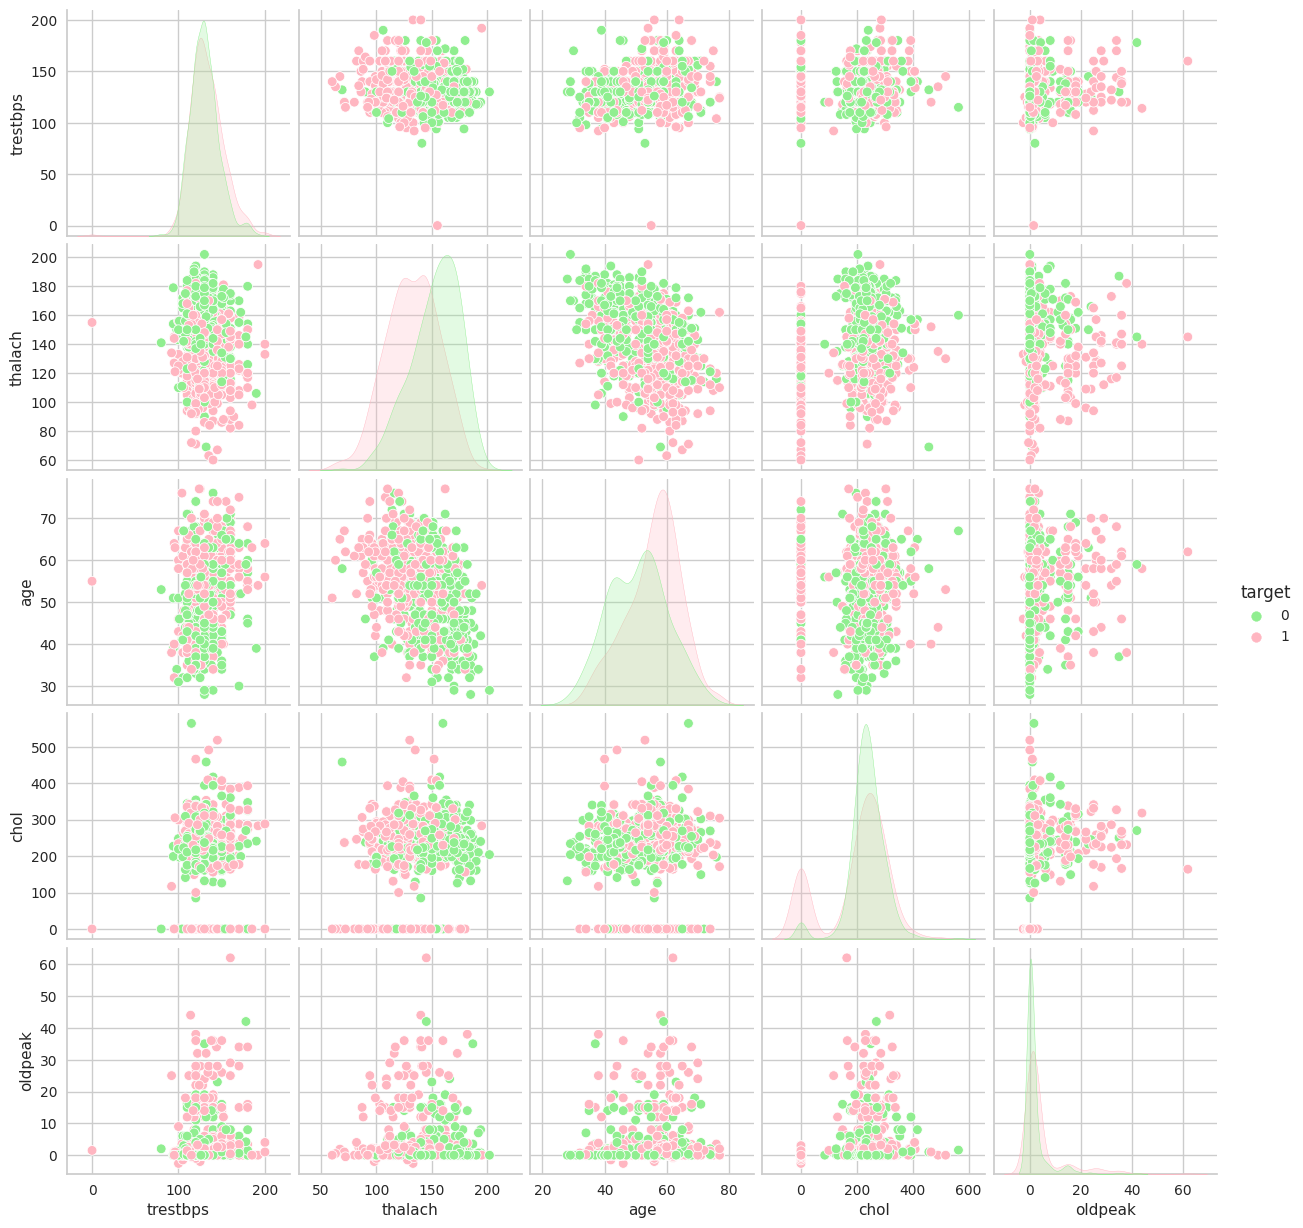

In [91]:
sns.pairplot(pd.concat([data_train_lb[num_ft], y_train_binary], axis=1), hue= 'target', diag_kind="kde", palette = ['lightgreen','lightpink'])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve, learning_curve, RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

In [93]:
def make_plot_scores(dataset, feature, regression=False, cat_cols= cat_ft):

    # Create a copy of the train data removing all the rows containing missing values
    df_copy = dataset.dropna().copy()

    # We set the target
    y_copy = feature.copy()

    discrete_features = df_copy.columns.isin(cat_cols)

    # Obtain scores of mutual information

    if regression:
        scores = mutual_info_regression(df_copy, y_copy, discrete_features=discrete_features, random_state = 1)
        pass
    else:
        scores = mutual_info_classif(df_copy, y_copy, discrete_features=discrete_features, random_state = 1)

    list_features = []

    for name_ft in df_copy.columns:
        list_features.append(dict_fts[name_ft])

    scores = pd.Series(scores, name="Scores", index=list_features)

    # Retain positive non-zero scores
    scores = scores[scores > 0].sort_values(ascending = False)
    
    # Create bar plot
    width = np.arange(len(scores))
    ticks = list(scores.index)

    sns.set_style('whitegrid')
    sns.barplot(x = scores, y = width, orient='h', color='lightseagreen')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

    return scores.sort_values(ascending = False)

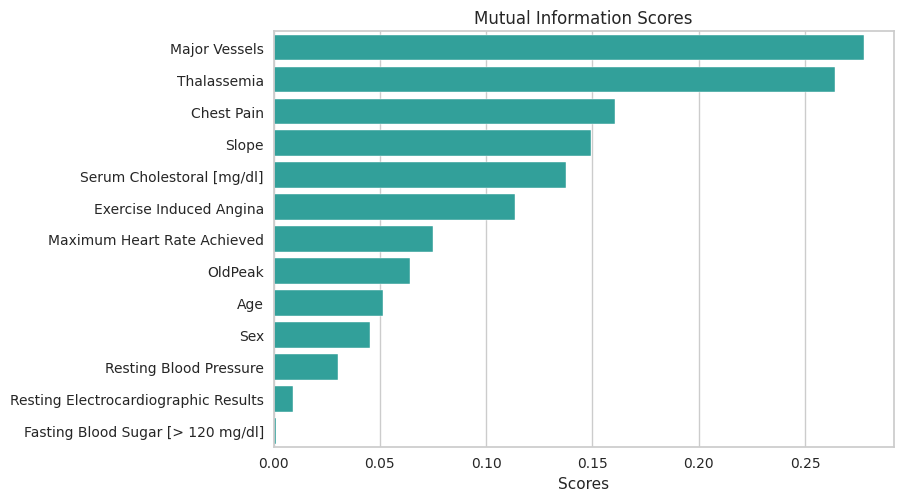

In [94]:
scores = make_plot_scores(dataset= data_train, feature=y_train_binary)

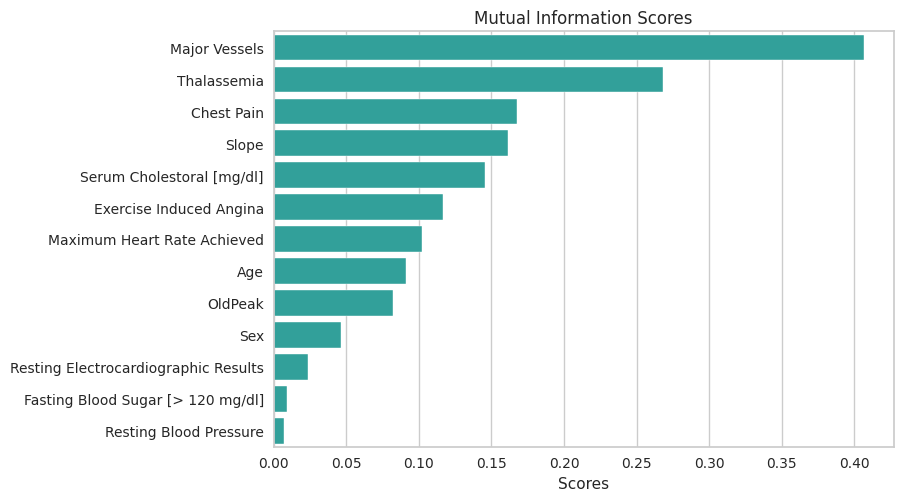

In [95]:
scores = make_plot_scores(dataset= data_train, feature=y_train)

In [96]:
def make_barplot(feature1, feature2, dataset = data_train, horizontal = False):

    dataset_obj = dataset.copy()

    color_palette = ['lightgreen','lightpink', 'salmon', 'hotpink','orchid']  

    if horizontal: 

        df = dataset_obj.groupby(feature1)[feature2].value_counts(normalize=True).mul(100).rename('Percentage %').reset_index()
       
        sns.barplot(y=feature1, x='Percentage %', hue=feature2, data=df, orient= 'h', palette = color_palette, edgecolor=(0,0,0))
        plt.xlim([0,100])

        if feature2 in dict_fts.keys():
            title = dict_fts[feature2]
        else:
            title=feature2
            
        plt.legend(loc='best', title=title)
        fg = plt.gcf()
        ax = plt.gca()

        for p in ax.patches:
            ax.annotate(f'{round(p.get_width(),1)}%', 
                        (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha = 'center', va = 'center', 
                        xytext = (30, 0), 
                        textcoords = 'offset points')

    else: 

        df = dataset_obj.groupby(feature1)[feature2].value_counts(normalize=True).mul(100).rename('Percentage %').reset_index()
        sns.barplot(x=feature1, y='Percentage %', hue=feature2, data=df, palette = color_palette, edgecolor=(0,0,0)) 

        plt.ylim([0,100])
        if feature2 in dict_fts.keys():
            title = dict_fts[feature2]
        else:
            title=feature2
        plt.legend(loc='best', title=title)

        fg = plt.gcf()
        ax = plt.gca()

        for p in ax.patches:
            ax.annotate(f'{round(p.get_height(),1)}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

    return (ax, fg)

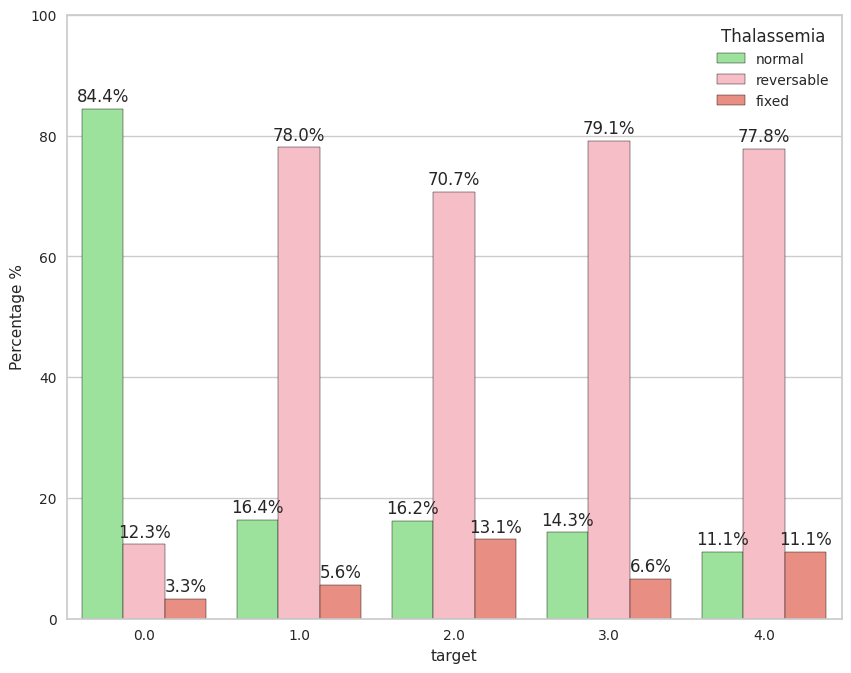

In [97]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','thal', dataset= pd.concat([data_train_lb,y_train], axis=1))

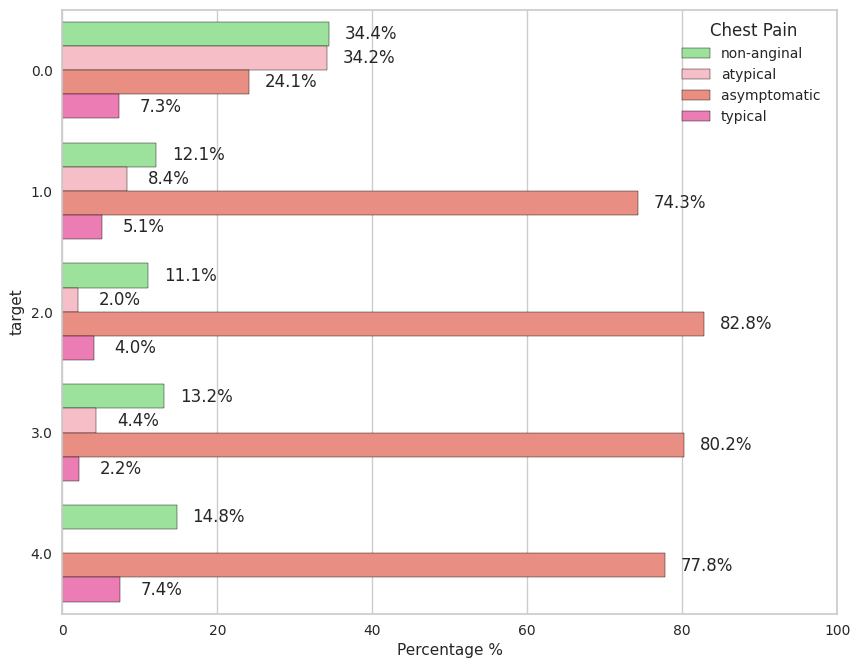

In [98]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','cp', dataset= pd.concat([data_train_lb,y_train], axis=1), horizontal=True)

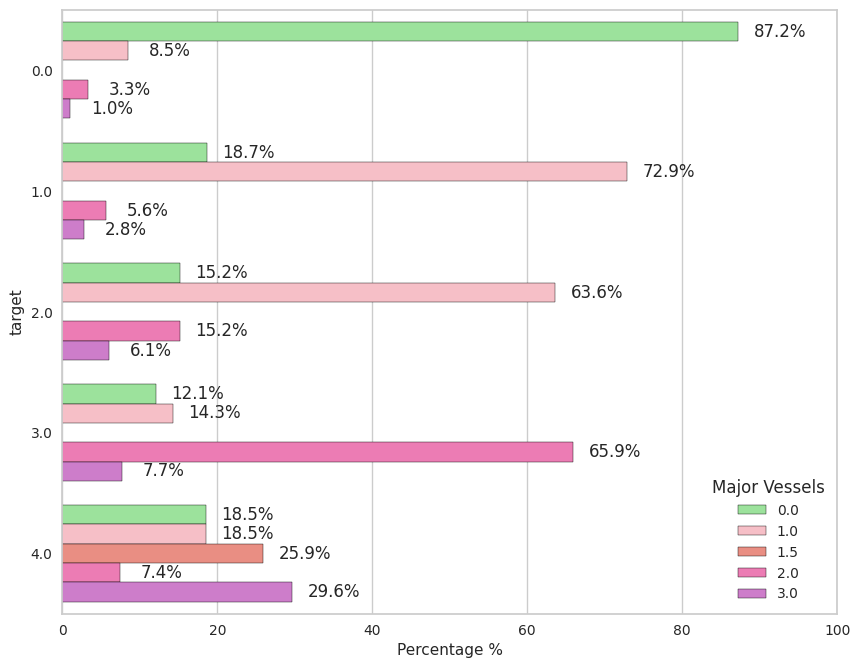

In [99]:
plt.figure(figsize=(10,8))
ax, fg = make_barplot('target','ca', dataset= pd.concat([data_train_lb,y_train], axis=1), horizontal=True)

In [100]:
def make_boxes(dataset, ft_x,ft_y):

    plt.figure(figsize=(10.0, 6.0)) 
    color_palette = ['lightgreen','lightpink', 'salmon', 'hotpink','orchid']

    sns.boxplot(y=dataset[ft_x], x =ft_y, palette = color_palette)

    if ft_x in dict_fts:
        ft_x = dict_fts[ft_x]
        
    plt.title(f'{ft_x}')

    plt.show()

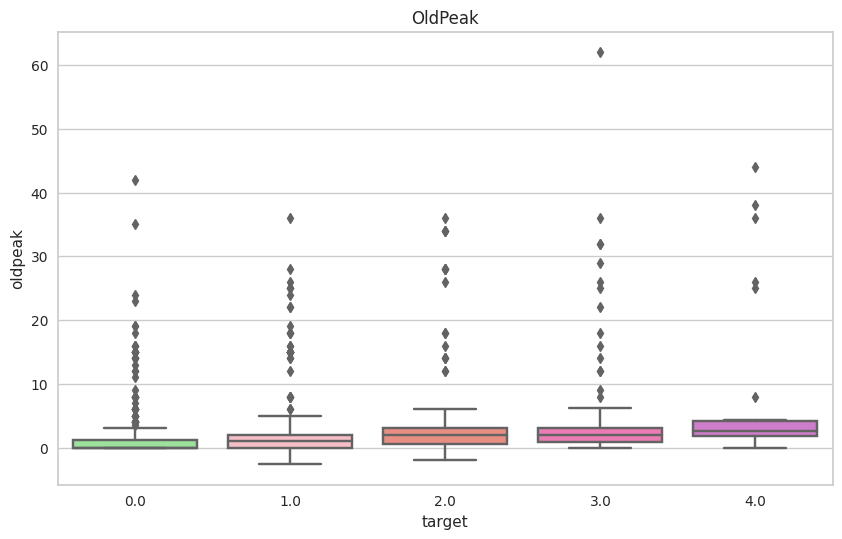

In [101]:
make_boxes(data_train, 'oldpeak', y_train)

In [102]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded = pd.DataFrame(encoder.fit_transform(data_train[cat_ft]))
test_encoded = pd.DataFrame(encoder.transform(data_test[cat_ft]))

# Redefine index
train_encoded.index = data_train.index
test_encoded.index = data_test.index

# Set informative feature names
train_encoded.columns = encoder.get_feature_names_out(cat_ft)
test_encoded.columns = encoder.get_feature_names_out(cat_ft)

# Fetch numerical variable
num_train = data_train.drop(cat_ft, axis=1)
num_test = data_test.drop(cat_ft, axis=1)

# Add one-hot encoded categorical data to numerical features
train_encoded = pd.concat([num_train, train_encoded], axis=1)
test_encoded = pd.concat([num_test, test_encoded], axis=1)

In [103]:
train_encoded[train_encoded.columns.difference(num_ft)].head()

,ca_0.0,ca_1.0,ca_1.5,ca_2.0,ca_3.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,exang_0.0,...,restecg_1.0,restecg_2.0,sex_0.0,sex_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
625,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
619,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [104]:
train_encoded[['sex_0.0','sex_1.0']].head()

,sex_0.0,sex_1.0
625,1.0,0.0
717,0.0,1.0
619,1.0,0.0
968,1.0,0.0
154,1.0,0.0


In [105]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_encoded_pos = pd.DataFrame(encoder.fit_transform(data_train_pos[cat_ft]))
test_encoded_pos = pd.DataFrame(encoder.transform(data_test_pos[cat_ft]))

# Redefine index
train_encoded_pos.index = data_train_pos.index
test_encoded_pos.index = data_test_pos.index

# Set informative feature names
train_encoded_pos.columns = encoder.get_feature_names_out(cat_ft)
test_encoded_pos.columns = encoder.get_feature_names_out(cat_ft)

# Fetch numerical variable
num_train = data_train_pos.drop(cat_ft, axis=1)
num_test = data_test_pos.drop(cat_ft, axis=1)

# Add one-hot encoded categorical data to numerical features
train_encoded_pos = pd.concat([num_train, train_encoded_pos], axis=1)
test_encoded_pos = pd.concat([num_test, test_encoded_pos], axis=1)

In [106]:
scaler = StandardScaler()

train_scaled= pd.DataFrame(scaler.fit_transform(train_encoded[num_ft]))
test_scaled= pd.DataFrame(scaler.transform(test_encoded[num_ft]))

# Redefine index
train_scaled.index = train_encoded.index
test_scaled.index = test_encoded.index

train_scaled.columns = num_ft
test_scaled.columns = num_ft

# Fetch encoded features 
cat_train = train_encoded.drop(num_ft, axis=1)
cat_test = test_encoded.drop(num_ft, axis=1)

# Add scaled numerical variables to encoded features
train_prep = pd.concat([cat_train, train_scaled], axis=1)
test_prep = pd.concat([cat_test, test_scaled], axis=1)

In [107]:
train_prep[num_ft].describe()

,trestbps,thalach,age,chol,oldpeak
count,8.290000e+02,8.290000e+02,8.290000e+02,8.290000e+02,8.290000e+02
mean,-3.428433e-17,-4.671240e-16,-1.671361e-16,-1.371373e-16,6.214035e-17
std,1.000604e+00,1.000604e+00,1.000604e+00,1.000604e+00,1.000604e+00
min,-7.269780e+00,-3.255795e+00,-2.689896e+00,-2.233505e+00,-8.303597e-01
25%,-6.456344e-01,-7.195742e-01,-7.818945e-01,-1.991356e-01,-4.603917e-01
50%,-9.362232e-02,7.299474e-02,6.610621e-02,1.829541e-01,-3.180963e-01
75%,4.583898e-01,7.863068e-01,7.021068e-01,5.547170e-01,-1.758009e-01
max,3.770462e+00,2.371445e+00,2.504108e+00,3.590781e+00,8.361923e+00


In [108]:
scaler = StandardScaler()
train_scaled_pos= pd.DataFrame(scaler.fit_transform(train_encoded_pos[num_ft]))
test_scaled_pos= pd.DataFrame(scaler.transform(test_encoded_pos[num_ft]))

# Redefine index
train_scaled_pos.index = train_encoded_pos.index
test_scaled_pos.index = test_encoded_pos.index

train_scaled_pos.columns = num_ft
test_scaled_pos.columns = num_ft

# Fetch encoded features 
cat_train = train_encoded_pos.drop(num_ft, axis=1)
cat_test = test_encoded_pos.drop(num_ft, axis=1)

# Add scaled numerical variables to encoded features
train_prep_pos = pd.concat([cat_train, train_scaled_pos], axis=1)
test_prep_pos = pd.concat([cat_test, test_scaled_pos], axis=1)

In [109]:
def make_umap(neighbors_list, dist_list, X, y):

    color_palette = sns.color_palette("husl", y.nunique())
    i=1

    for n in neighbors_list:

        for d in dist_list:

            reducer = umap.UMAP(min_dist=d, n_components=2, n_neighbors=n, random_state=42)
            mapper = reducer.fit(X)
            embedding_train = mapper.transform(X)

            train_2d = pd.DataFrame(embedding_train, index= X.index, columns=['var0', 'var1'])
            data_2d = pd.concat([train_2d, y], axis=1)

            legend = False 
            if i == (1):
                legend = True

            plt.subplot(len(neighbors_list) ,len(dist_list),i)
            sns.scatterplot(x= data_2d['var0'], y= data_2d['var1'], hue=data_2d['target'], palette= color_palette, legend = legend)
            plt.title(f'Minimum distance: {d}, neighbors: {n}')
            plt.gca().set_aspect('equal', 'datalim')
            i+=1

            if n == neighbors_list[-1]:
                plt.gca().set_xlabel('var0')
            else: plt.gca().set_xlabel(' ')

    plt.show()

In [116]:
neighbors_list = [5, 10, 20, 40, 80, 160]
dist_list = [0.01, 0.1, 0.2, 0.5, 0.8]
plt.figure(figsize=(20,25))
make_umap(neighbors_list, dist_list, train_prep, y_train);

AttributeError: ignored

<Figure size 2000x2500 with 0 Axes>

In [ ]:
neighbors_list = [5, 10, 20, 40, 80, 160]
dist_list = [0.01, 0.1, 0.2, 0.5, 0.8]

plt.figure(figsize=(20,25))
make_umap(neighbors_list, dist_list, train_prep, y_train_binary);

In [111]:


def plot_val_curve(model_name, param_name, param_list, get_train_test_scores, X_train, y_train, my_model):
    
    train_scores, val_scores = get_train_test_scores(model_name, my_model, X_train, y_train, param_name, param_list)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    pos_max = np.argmax(val_scores_mean)
    
    print(f'The maximum mean score achieved in validation set is {round(np.max(val_scores_mean)*100,1)}% with {param_name}={param_list[pos_max]}')

    plt.figure()
    plt.title(f'{model_name} - Validation Curve')

    plt.xlabel(f'{param_name}')
    plt.ylabel('Score')
    #plt.ylim([0.5, 1.0])

    plt.grid(True)
    lw=2

    plt.semilogx(param_list, train_scores_mean, 'o-', label='Training score', color='lightgreen', lw=lw)
    plt.fill_between(param_list, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='lightgreen', lw=lw)
    plt.semilogx(param_list, val_scores_mean, 'o-', label='Cross-validation score', color='hotpink', lw=lw)
    plt.fill_between(param_list, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='hotpink', lw=lw)

    plt.legend(loc="best")
    
    return plt.gca()

In [112]:
def get_train_test_scores(model_name, my_model, X_train, y_train, param_name, param_list):
    #param_name_transform = model_name.lower().replace(" ", "") + '__' + param_name
    
    print(f'{model_name}: {param_name} parameter variation.')
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    train_scores, val_scores = validation_curve(my_model, X_train.values, y_train.values, 
                                             param_name =param_name,
                                             param_range = param_list, cv= cv, scoring='f1_weighted')

    return train_scores, val_scores

In [113]:
def plot_learning_curve(model_name, model, X_train, y_train):

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv = cv, scoring='f1_weighted', train_sizes= np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(test_scores, axis=1)
    val_scores_std = np.std(test_scores, axis=1)

    plt.title(f'{model_name} - Learning Curve')

    plt.xlabel('Training samples')
    plt.ylabel('Score')

    plt.grid(True)
    lw=2

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score', color='darkturquoise')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2,color='darkturquoise', lw=lw)
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation score', color= 'darkorange')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='darkorange', lw=lw)

    print(f'The maximum mean score achieved in validation set is {round(np.max(val_scores_mean)*100,1)}%')

    plt.legend(loc="best")

    return plt.gca()

In [118]:
x = heart_train.drop(['target'], axis=1)
y = heart_train['target']

In [119]:
x = MinMaxScaler().fit_transform(x)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.490 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [122]:
print(grid.best_params_)
print(grid.best_estimator_)


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


SVC RBF: C parameter variation.
The maximum mean score achieved in validation set is 92.5% with C=5


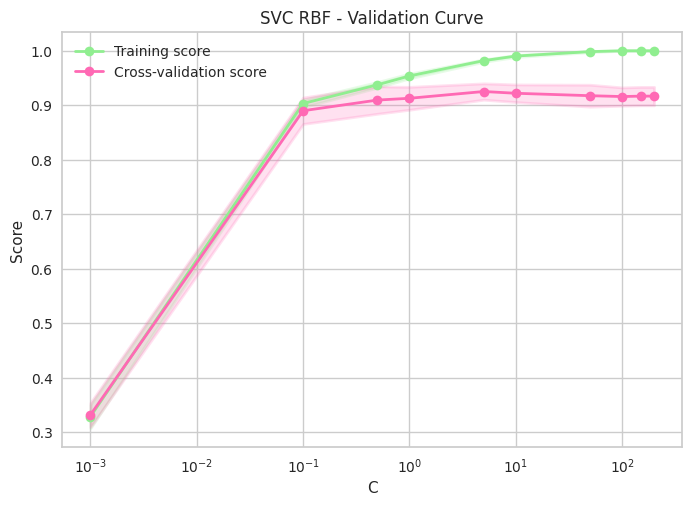

In [123]:
C_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]

class_model = svm.SVC(kernel='rbf', class_weight='balanced')
plot_val_curve('SVC RBF', 'C', C_list, get_train_test_scores, train_prep, y_train_binary, class_model);

SVC RBF: gamma parameter variation.
The maximum mean score achieved in validation set is 90.9% with gamma=0.1


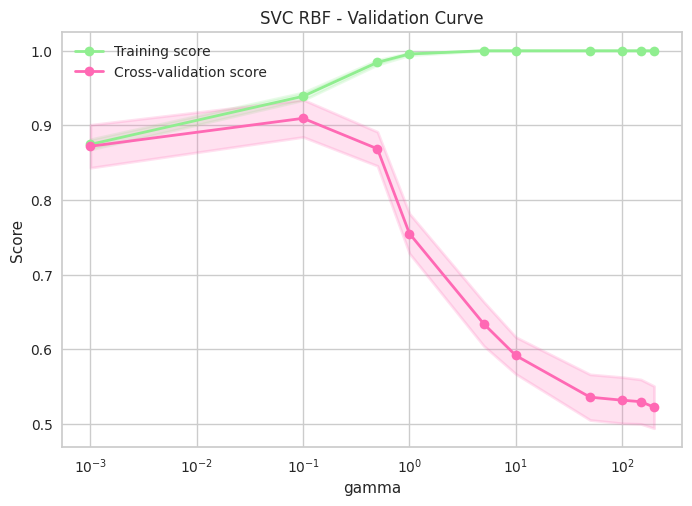

In [124]:
g_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]
class_model = svm.SVC(kernel='rbf', C=0.5, class_weight='balanced')
plot_val_curve('SVC RBF', 'gamma', g_list, get_train_test_scores, train_prep, y_train_binary, class_model);

The maximum mean score achieved in validation set is 90.9%


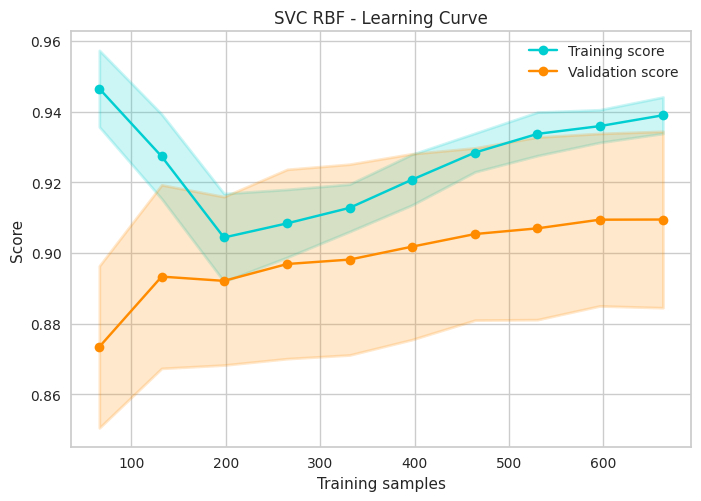

In [125]:
class_model = svm.SVC(kernel='rbf', C=0.5, gamma=0.1, class_weight='balanced')
plot_learning_curve('SVC RBF',class_model, train_prep, y_train_binary);

In [126]:
predict = svm.SVC(kernel='rbf', C=0.5, gamma=0.1, class_weight='balanced').fit(train_prep.values,y_train_binary.values).predict(test_prep.values)
print(classification_report(y_test_binary, predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       100
           1       0.97      0.91      0.94       108

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208



SVC Polynomial: degree parameter variation.
The maximum mean score achieved in validation set is 92.8% with degree=7


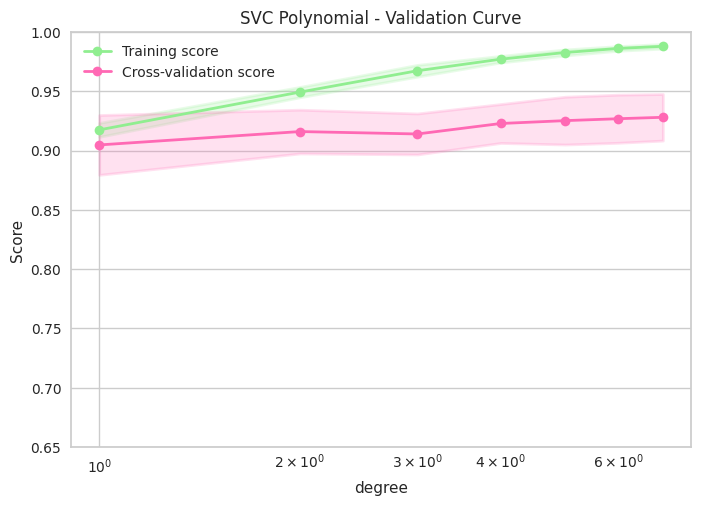

In [127]:
d_list= [1, 2, 3, 4, 5, 6, 7]
class_model = svm.SVC(kernel='poly', class_weight='balanced')
pt = plot_val_curve('SVC Polynomial', 'degree', d_list, get_train_test_scores, train_prep, y_train_binary.astype('category'), class_model);
pt.set_ylim([0.65, 1.0]);

SVC Polynomial: C parameter variation.
The maximum mean score achieved in validation set is 91.6% with C=1


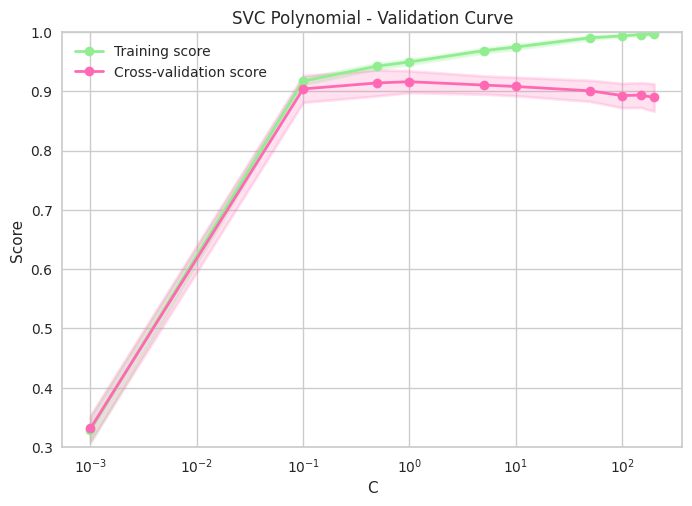

In [128]:
C_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]

class_model = svm.SVC(kernel='poly', degree=2, class_weight='balanced')
pt = plot_val_curve('SVC Polynomial', 'C', C_list, get_train_test_scores, train_prep, y_train_binary.astype('category'), class_model);
pt.set_ylim([0.3, 1.0]);

SVC Polynomial: gamma parameter variation.
The maximum mean score achieved in validation set is 91.4% with gamma=0.5


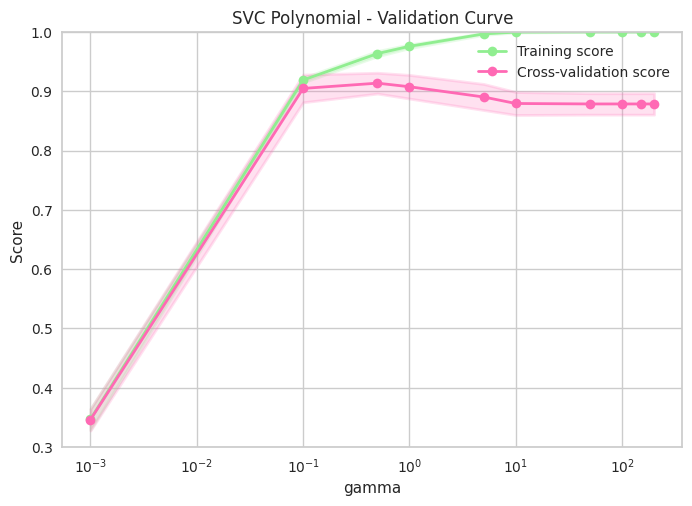

In [129]:
g_list= [0.001, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 200]

class_model = svm.SVC(kernel='poly', degree=2, C=0.1, class_weight='balanced')
pt = plot_val_curve('SVC Polynomial', 'gamma', g_list, get_train_test_scores, train_prep, y_train_binary.astype('category'), class_model);
pt.set_ylim([0.3, 1.0]);

The maximum mean score achieved in validation set is 90.5%


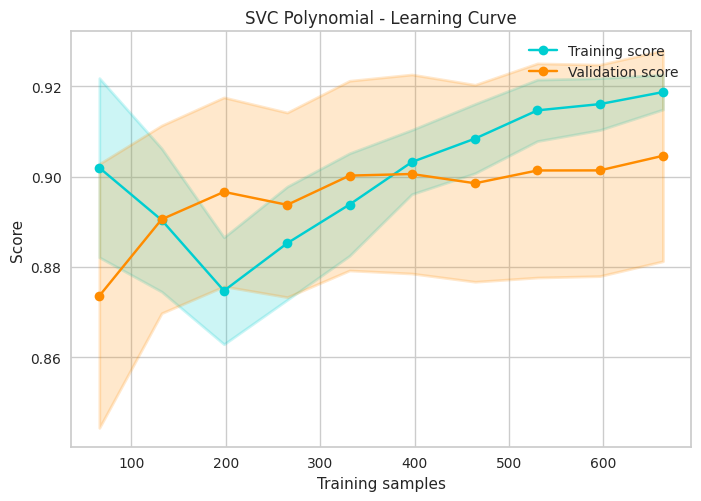

In [130]:
class_model = svm.SVC(kernel='poly', degree=2, C=0.1, gamma=0.1, class_weight='balanced')
plot_learning_curve('SVC Polynomial',class_model, train_prep, y_train_binary);

The maximum mean score achieved in validation set is 90.5%


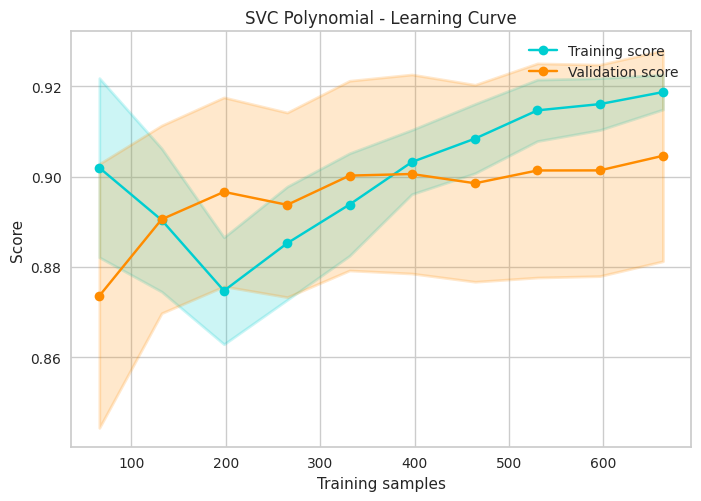

In [131]:
class_model = svm.SVC(kernel='poly', degree=2, C=0.1, gamma=0.1, class_weight='balanced')
plot_learning_curve('SVC Polynomial',class_model, train_prep, y_train_binary);

In [132]:
model = Sequential()
model.add(Dense(12, input_dim=train_prep.shape[1], activation='relu'))
model.add(Dense(2, activation='softmax'))

In [133]:
def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [134]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=f1_m)

In [135]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True) 

In [136]:
y_categorical = pd.DataFrame(to_categorical(y=y_binary, num_classes=2), index= y_binary.index)

In [137]:
y_categorical.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [138]:
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(train_prep, y_train_binary, stratify=y_train_binary, train_size=0.8, test_size=0.2)

In [139]:
y_train_nn_encoded = y_categorical.iloc[y_train_nn.index]
y_valid_nn_encoded = y_categorical.iloc[y_valid_nn.index]

In [140]:
weights = class_weight.compute_sample_weight('balanced', y_train_nn_encoded)

In [141]:
weights[:10]

array([0.92327032, 1.0867079 , 0.92327032, 1.0867079 , 1.0867079 ,
       0.92327032, 0.92327032, 1.0867079 , 1.0867079 , 0.92327032])

In [142]:
batch_size= 12
history = model.fit(X_train_nn.values,
                    y_train_nn_encoded,
                    epochs=200, 
                    batch_size=batch_size,
                    validation_data = (X_valid_nn.values, y_valid_nn_encoded), 
                    callbacks=es, sample_weight=weights)

Epoch 1/200
56/56 [==============================] - 2s 8ms/step - loss: 0.7560 - f1_m: 0.5387 - val_loss: 0.5978 - val_f1_m: 0.6738
Epoch 2/200
56/56 [==============================] - 0s 4ms/step - loss: 0.5383 - f1_m: 0.7351 - val_loss: 0.4451 - val_f1_m: 0.8131
Epoch 3/200
56/56 [==============================] - 0s 4ms/step - loss: 0.4241 - f1_m: 0.8304 - val_loss: 0.3670 - val_f1_m: 0.8560
Epoch 4/200
56/56 [==============================] - 0s 3ms/step - loss: 0.3592 - f1_m: 0.8586 - val_loss: 0.3290 - val_f1_m: 0.8738
Epoch 5/200
56/56 [==============================] - 0s 4ms/step - loss: 0.3169 - f1_m: 0.8735 - val_loss: 0.3051 - val_f1_m: 0.8857
Epoch 6/200
56/56 [==============================] - 0s 3ms/step - loss: 0.2881 - f1_m: 0.8750 - val_loss: 0.2907 - val_f1_m: 0.8917
Epoch 7/200
56/56 [==============================] - 0s 3ms/step - loss: 0.2687 - f1_m: 0.8884 - val_loss: 0.2779 - val_f1_m: 0.9036
Epoch 8/200
56/56 [==============================] - 0s 3ms/step - lo

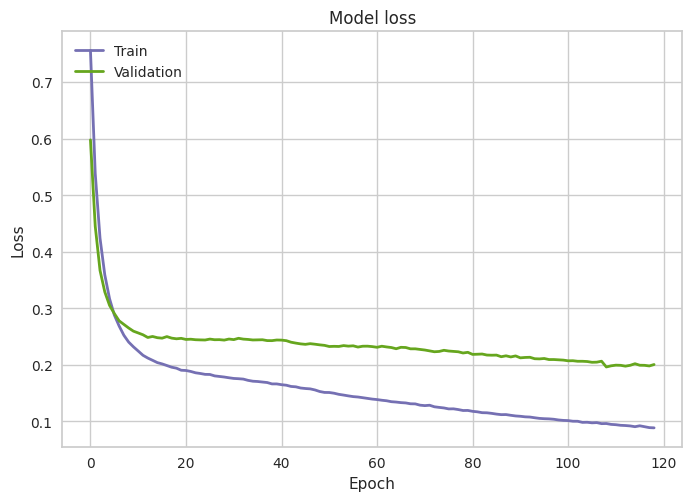

In [143]:
plt.plot(history.history['loss'], linewidth = 2.0)
plt.plot(history.history['val_loss'], linewidth = 2.0)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

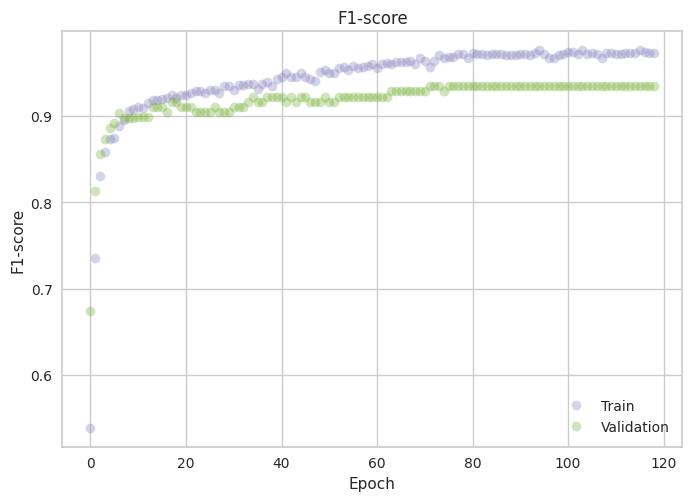

In [144]:
plt.plot(history.history['f1_m'],'o', alpha= 0.3)
plt.plot(history.history['val_f1_m'],'o', alpha= 0.3)
plt.title('F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [145]:
y_pred = model.predict(test_prep)
y_test_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test_binary,y_test_class))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       100
           1       0.95      0.93      0.94       108

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208



In [146]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes = np.unique(y_train), y= y_train)
pd.Series(class_weights, index = [0, 1, 2, 3, 4], name= 'Target weights')

0    0.408451
1    0.767196
2    1.726190
3    1.858974
4    7.631579
Name: Target weights, dtype: float64

In [147]:
depth_list = [2, 5, 5, 10, 15, 20, 25]

class_model = DecisionTreeClassifier(class_weight='balanced')

pt = plot_val_curve('Decision Tree Classifier', 'max_depth', depth_list, get_train_test_scores, train_prep, y_train, class_model);
pt.set_ylim([0.3, 1.05]);

Decision Tree Classifier: max_depth parameter variation.


ValueError: ignored

In [ ]:
class_model = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
pt = plot_learning_curve('Decision Tree Classifier', class_model, train_prep.values, y_train);
pt.set_ylim([0.0, 1.05]);

In [ ]:
predict = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=1).fit(train_prep.values,y_train.values).predict(test_prep.values)
print(classification_report(y_test, predict))

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=train_prep.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=f1_m)

In [ ]:
y_categorical = pd.DataFrame(to_categorical(y=y, num_classes=5), index= y.index)

y_train_cat = y_categorical.iloc[y_train.index,:]
y_test_cat = y_categorical.iloc[y_test.index,:]

In [ ]:
y_categorical.head()

In [ ]:
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(train_prep, y_train, stratify=y_train, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
y_train_nn_encoded = y_categorical.iloc[y_train_nn.index]
y_valid_nn_encoded = y_categorical.iloc[y_valid_nn.index]

weights = class_weight.compute_sample_weight('balanced', y_train_nn_encoded)

In [ ]:
batch_size=12

history = model.fit(X_train_nn.values,
                    y_train_nn_encoded,
                    epochs=200, 
                    batch_size=batch_size,
                    validation_data = (X_valid_nn.values, y_valid_nn_encoded), callbacks=es, sample_weight=weights)

In [ ]:
plt.plot(history.history['loss'], linewidth = 2.0)
plt.plot(history.history['val_loss'], linewidth = 2.0)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['f1_m'], 'o', alpha= 0.5)
plt.plot(history.history['val_f1_m'], 'o', alpha=0.5)
plt.title('F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(test_prep)
y_test_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test,y_test_class))